## Importing Libraries

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from math import sqrt, exp

## Ideal Lowpass Filter

In [3]:
# function to calculate distance between center and reference point
def distance(p1, p2):
  return sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

# ideal lowpass filter
def idealLP(image, D0):

  # allocating memory for the filter
  filter = np.zeros(image.shape[:2])
  rows, cols = image.shape[:2]

  # defining the center of the filter
  center = (rows/2, cols/2)

  for x in range(cols):
    for y in range(rows):
      if distance((y, x), center) < D0:
        filter[y, x] = 1

  return filter

<ipython-input-14-064f8c66b777>:7: RuntimeWarning: divide by zero encountered in log
  plt.subplot(161), plt.imshow(np.log(1 + np.abs(testPattern)), "gray"), plt.title("Original Image")


(<Axes: title={'center': 'Inverse Fourier Transform'}>,
 Text(0.5, 1.0, 'Inverse Fourier Transform'))

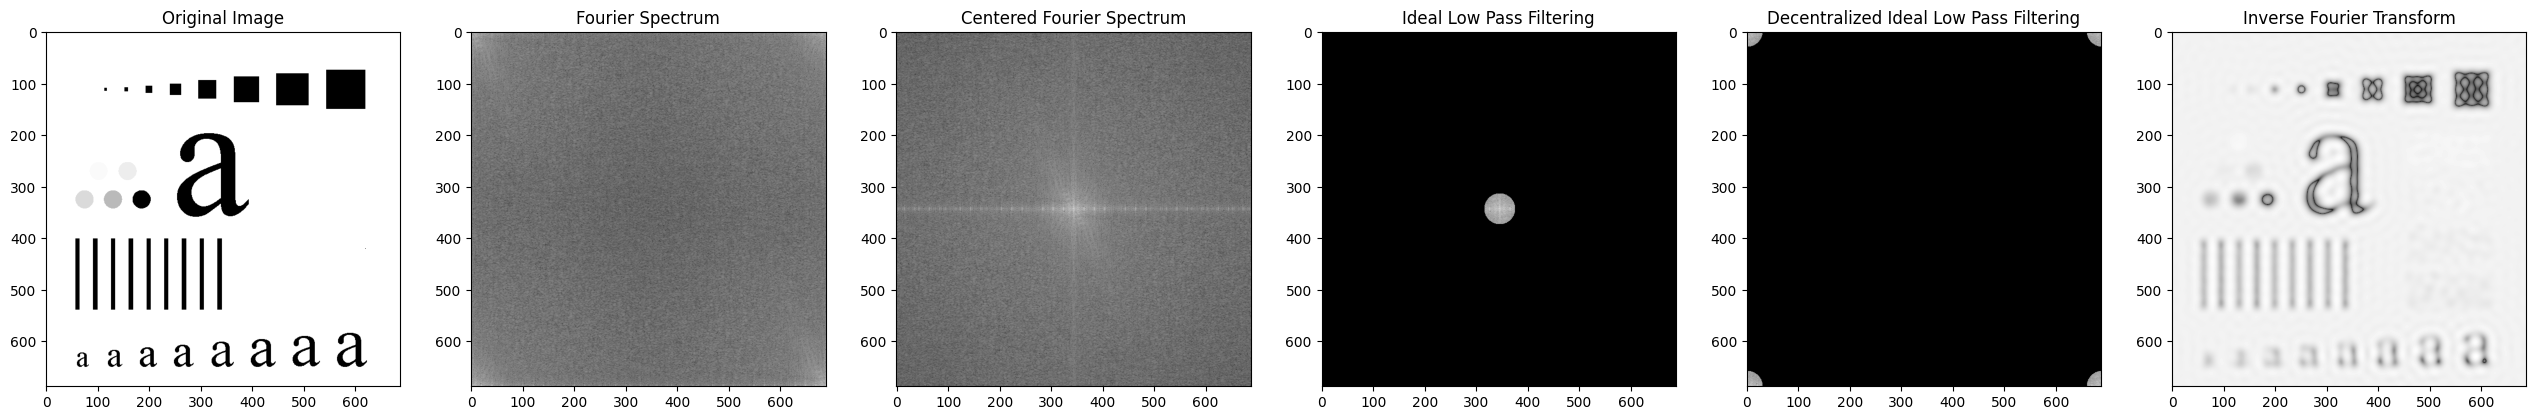

In [14]:
# preparing grid for displaying results
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

# loading the image
testPattern = cv2.imread('test_pattern.tif')
testPattern = cv2.cvtColor(testPattern, cv2.COLOR_BGR2GRAY)
plt.subplot(161), plt.imshow(np.log(1 + np.abs(testPattern)), "gray"), plt.title("Original Image")

# fourier transform of the original image
testPattern_fourier = np.fft.fft2(testPattern)
plt.subplot(162), plt.imshow(np.log(1 + np.abs(testPattern_fourier)), "gray"), plt.title("Fourier Spectrum")

# centered fourier spectrum
testPattern_fourier_centered = np.fft.fftshift(testPattern_fourier)
plt.subplot(163), plt.imshow(np.log(1 + np.abs(testPattern_fourier_centered)), "gray"), plt.title("Centered Fourier Spectrum")

# ideal LP filtering (change the D0 parameter to observe changes in the result with different radii)
testPattern_idealLP = testPattern_fourier_centered * idealLP(testPattern, 30)
plt.subplot(164), plt.imshow(np.log(1 + np.abs(testPattern_idealLP)), "gray"), plt.title("Ideal Low Pass Filtering")

# decentralized LP
testPattern_idealLP_decentralized = np.fft.ifftshift(testPattern_idealLP)
plt.subplot(165), plt.imshow(np.log(1 + np.abs(testPattern_idealLP_decentralized)), "gray"), plt.title("Decentralized Ideal Low Pass Filtering")

# Inverse Fourier Transform
testPattern_inverseFourier = np.fft.ifft2(testPattern_idealLP_decentralized)
plt.subplot(166), plt.imshow(np.log(1 + np.abs(testPattern_inverseFourier)), "gray"), plt.title("Inverse Fourier Transform")

## Ideal High Pass Filter

In [26]:
# function to calculate distance between center and reference point
def distance(p1, p2):
  return sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

# ideal highpass filter
def idealHP(image, D0):

  # allocating memory for the filter
  filter = np.ones(image.shape[:2])
  rows, cols = image.shape[:2]

  # defining the center of the filter
  center = (rows/2, cols/2)

  for x in range(cols):
    for y in range(rows):
      if distance((y, x), center) < D0:
        filter[y, x] = 0

  return filter

<ipython-input-32-382ce3e927dd>:7: RuntimeWarning: divide by zero encountered in log
  plt.subplot(161), plt.imshow(np.log(1 + np.abs(building)), "gray"), plt.title("Original Image")


(<Axes: title={'center': 'Inverse Fourier Transform'}>,
 Text(0.5, 1.0, 'Inverse Fourier Transform'))

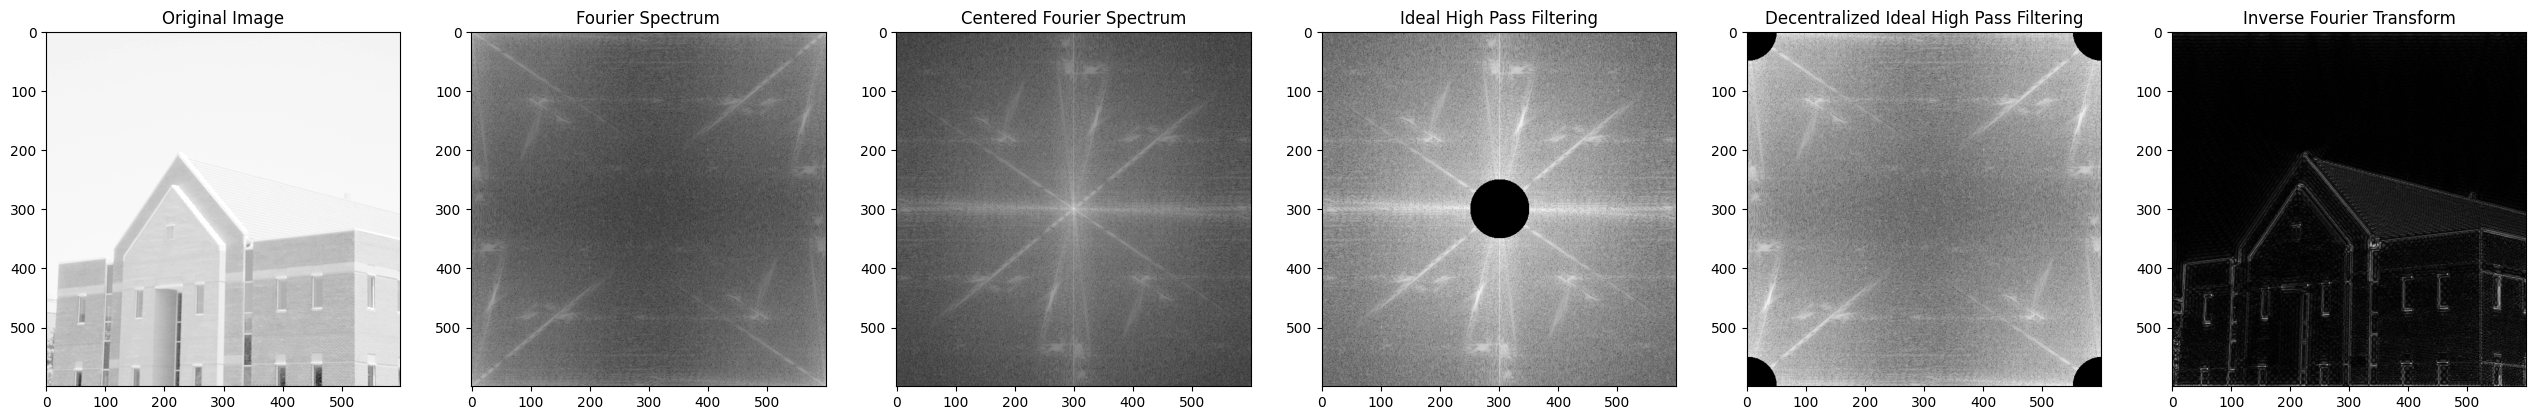

In [32]:
# preparing grid for displaying results
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

# loading the image
building = cv2.imread('building.tif')
building = cv2.cvtColor(building, cv2.COLOR_BGR2GRAY)
plt.subplot(161), plt.imshow(np.log(1 + np.abs(building)), "gray"), plt.title("Original Image")

# fourier transform of the original image
building_fourier = np.fft.fft2(building)
plt.subplot(162), plt.imshow(np.log(1 + np.abs(building_fourier)), "gray"), plt.title("Fourier Spectrum")

# centered fourier spectrum
building_fourier_centered = np.fft.fftshift(building_fourier)
plt.subplot(163), plt.imshow(np.log(1 + np.abs(building_fourier_centered)), "gray"), plt.title("Centered Fourier Spectrum")

# ideal HP filtering (change the D0 parameter to observe changes in the result with different radii)
building_idealHP = building_fourier_centered * idealHP(building, 50)
plt.subplot(164), plt.imshow(np.log(1 + np.abs(building_idealHP)), "gray"), plt.title("Ideal High Pass Filtering")

# decentralized HP
building_idealHP_decentralized = np.fft.ifftshift(building_idealHP)
plt.subplot(165), plt.imshow(np.log(1 + np.abs(building_idealHP_decentralized)), "gray"), plt.title("Decentralized Ideal High Pass Filtering")

# Inverse Fourier Transform
building_inverseFourier = np.fft.ifft2(building_idealHP_decentralized)
plt.subplot(166), plt.imshow(np.abs(building_inverseFourier), "gray"), plt.title("Inverse Fourier Transform")